# GenAI-Powered Knowledge Management System

Materials used: Agentic RAG based on LangGraph with Jira and Confluence

Course: **AI Agents in LangGraph** https://learn.deeplearning.ai/courses/ai-agents-in-langgraph/lesson/1/introduction

Documentation: https://python.langchain.com/v0.2/docs/introduction/

GitHub: https://github.com/langchain-ai/langgraph/tree/main

LangGraph and RAG: https://github.com/langchain-ai/langgraph/tree/main/examples/rag

Agentic RAG: https://github.com/langchain-ai/langgraph/blob/main/examples/rag/langgraph_agentic_rag.ipynb

# 0. Synthetic data generation.


## 0.1. Generate synthetic data in JSON format to emulate Confluence data.

The data is dedicated to the description of a fictitious software product called "Moon Flight System".

### How to Execute:
1. Save the above code in a file, for example, `generate_synthetic_data.py`.
2. Run the script using Python:
   ```sh
   python generate_synthetic_data.py
   ```
3. Follow the prompts to enter the number of synthetic data entries and the desired file name.

This script will generate the requested number of synthetic data entries, complete with metadata and descriptions, and save them to the specified JSON file.

In [ ]:
import json
import random

def generate_synthetic_data(count):
    titles = [
        "Moon Flight System Documentation",
        "Release Notes",
        "Functional Overview",
        "Hardware and Software Requirements",
        "Installation Instructions",
        "System Architecture",
        "User Manual",
        "API Reference"
    ]

    descriptions = [
        "This document describes the contents of Moon Flight System 2024.1, March 2024. Purpose: The work completed for this release encompasses the following areas: Enhanced Navigation Algorithms, New User Interfaces, Extended Data Integration, Enhanced Security Features.",
        "The system requirements for Moon Flight System release 2024.1 are described as follows: requires a quad-core processor, 16GB RAM, 250GB SSD, and Internet connectivity.",
        "Deliverables: The server software is distributed in the form of a zip file. For example, in the MFS-2024.1-UNIX.zip file, contains binaries, libraries, and installation scripts.",
        "Installation Instructions: Unzip the MFS-2024.1.zip file, run the installer script with sudo privileges. Follow the prompts to complete the installation process.",
        "API Reference: Moon Flight System offers a comprehensive API with endpoints for mission planning, trajectory calculation, system status, user management, and data retrieval.",
        "System Architecture: The system consists of three major modules: Flight Control, Data Analytics, and User Interaction. Each module is further divided into microservices."
    ]

    data = []

    for i in range(count):
        entry = {
            "metadata": {
                "title": random.choice(titles),
                "id": str(282083988 + i),
                "source": f"https://moonflightsystem.com/docs/{282083988 + i}"
            },
            "page_content": random.choice(descriptions)
        }
        data.append(entry)

    return data

def save_to_file(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

In [ ]:
data_count = int(input("Enter the number of synthetic data entries to generate: "))
file_name = input("Enter the output file name (including .json extension): ")

synthetic_data = generate_synthetic_data(data_count)
save_to_file(synthetic_data, file_name)
print(f"Synthetic data saved to {file_name}")

Enter the number of synthetic data entries to generate: 10000
Enter the output file name (including .json extension): moon_flight_system_data_10k.json
Synthetic data saved to moon_flight_system_data_10k.json


## 0.2. Generates synthetic data in CSV format to emulate Jira data.

The data contains Jira ticket information for a fictitious software product called "Moon Flight System".

### Usage
1. Run the script.
2. It will ask you to enter the number of tickets to generate and the output filename (e.g., `jira_tickets.csv`).
3. The script will then generate the synthetic data and save it to the specified CSV file.

This script uses the `Faker` library to generate realistic random data for various fields. Make sure to install the `Faker` library if you haven't already:
```sh
pip install faker
```

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.1 MB/s eta 0:00:00


In [ ]:
import csv
import random
import datetime
from faker import Faker

# Initialize faker for generating random data
fake = Faker()

# Define the list of headers
HEADERS = [
    "Summary", "Ticket key", "Ticket id", "Ticket Type", "Status", "Project key", "Project name", "Project type",
    "Project lead", "Project description", "Project url", "Priority", "Resolution", "Assignee", "Reporter", "Creator",
    "Created", "Updated", "Last Viewed", "Resolved", "Affects Version/s", "Fix Version/s", "Component/s", "Due Date",
    "Votes", "Labels", "Description", "Environment", "Watchers", "Log Work", "Original Estimate",
    "Remaining Estimate", "Time Spent", "Work Ratio", "Σ Original Estimate", "Σ Remaining Estimate",
    "Σ Time Spent", "Security Level", "Attachment", "Custom field (% Executed)", "Comment"
]

# Define some sample data
PROJECT_KEYS = ["MFS"]
PROJECT_NAMES = ["Moon Flight System"]
TICKET_TYPES = ["Bug", "Improvement", "Task", "New Feature"]
STATUSES = ["Open", "In Progress", "Closed", "Reopened"]
PRIORITIES = ["Low", "Medium", "High", "Critical"]
RESOLUTIONS = ["Fixed", "Won't Fix", "Duplicate", "Incomplete"]
COMPONENTS = ["Core", "UI", "Backend", "Integration"]
LABELS = ["label1", "label2", "label3", "label4"]

# Format for generated date strings
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"

# Generate random ticket key
def generate_ticket_key(project_key, ticket_id):
    return f"{project_key}-{ticket_id}"

# Generate random date string
def random_date(start, end):
    start_date = datetime.datetime.strptime(start, "%Y-%m-%d")
    end_date = datetime.datetime.strptime(end, "%Y-%m-%d")
    return fake.date_time_between(start_date=start_date, end_date=end_date).strftime(DATE_FORMAT)

# Generate random data for each field
def generate_ticket(ticket_id):
    project_key = random.choice(PROJECT_KEYS)
    project_name = random.choice(PROJECT_NAMES)
    ticket_type = random.choice(TICKET_TYPES)
    status = random.choice(STATUSES)
    priority = random.choice(PRIORITIES)
    resolution = random.choice(RESOLUTIONS)
    summary = fake.sentence()
    description = fake.text()
    environment = fake.sentence()
    assignee = fake.user_name()
    reporter = fake.user_name()
    creator = fake.user_name()
    created = random_date("2023-09-01", "2023-09-30")
    updated = random_date("2023-09-01", "2023-10-30")
    resolved = random_date("2023-09-01", "2023-10-30") if status == "Closed" else ""
    return [
        summary, generate_ticket_key(project_key, ticket_id), ticket_id, ticket_type, status, project_key, project_name, "software",
        assignee, f"{project_name} software project", fake.url(), priority, resolution, assignee, reporter, creator,
        created, updated, "", resolved, random.choice(LABELS), random.choice(LABELS), random.choice(COMPONENTS), random_date("2023-11-01", "2023-12-31"),
        random.randint(0, 10), random.choice(LABELS), description, environment, assignee, "", "", "", "", "",
        "", "", "", "", "", "", "", "", status, "", "", "", random.choice(LABELS), "", random.choice(LABELS), description
    ]

# Generate specified number of tickets
def generate_tickets(n):
    tickets = []
    for ticket_id in range(1, n + 1):
        tickets.append(generate_ticket(ticket_id))
    return tickets

# Save tickets to CSV file
def save_to_csv(filename, tickets):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerow(HEADERS)
        writer.writerows(tickets)


In [ ]:
number_of_tickets = int(input("Enter the number of tickets to generate: "))
output_filename = input("Enter the output CSV filename: ")
tickets = generate_tickets(number_of_tickets)
save_to_csv(output_filename, tickets)
print(f"Generated {number_of_tickets} tickets and saved to {output_filename}")

Enter the number of tickets to generate: 10000
Enter the output CSV filename: jira_tickets_10k.csv
Generated 10000 tickets and saved to jira_tickets_10k.csv


# 1. Setup

In [ ]:
!pip -q  install  loguru
!pip -q  install  sentence-transformers
!pip -q  install  rank_bm25
!pip -q  install  faiss-gpu
!pip -q  install  openai==1.30.1
!pip -q  install  langgraph==0.0.53
!pip -q  install  langchain_core==0.2.0
!pip -q  install  langchain_openai==0.1.7
!pip -q  install  langchain-community==0.2.0
!pip -q  install  langchain==0.2.0
!apt -q  install  libgraphviz-dev
!pip -q  install  pygraphviz==1.13
!pip -q  install  python-dotenv~=1.0.1
!pip -q  install  langchainhub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.

### 1.1.Function for Splitting documents
RecursiveCharacterTextSplitter see here: https://python.langchain.com/v0.2/docs/how_to/recursive_text_splitter/

In [ ]:
from loguru import logger # Import logger
import time
# Import necessary modules for splitting text into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter
def split_documents(documents):
  # Function to split documents into chunks using RecursiveCharacterTextSplitter
    logger.debug('split_documents............')
    start_time = time.time()
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=0)
    source_chunks = text_splitter.split_documents(documents)
    logger.debug(type(source_chunks))
    logger.debug(len(source_chunks))
    logger.debug(source_chunks[10].metadata)
    # logger.debug(source_chunks[10].page_content)
    end_time = time.time()
    elapsed_time = end_time - start_time
    logger.debug(f'split_documents elapsed_time = {elapsed_time} sec')
    return source_chunks

### 1.2. Getting Embeddings

#### 1.2.1. Function for Getting Embeddings Model from HuggingFace
HuggingFaceEmbeddings see here: https://api.python.langchain.com/en/latest/huggingface/embeddings/langchain_huggingface.embeddings.huggingface.HuggingFaceEmbeddings.html#

In [ ]:
# Import HuggingFaceEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
def get_embeddings(type='cpu'):
  # Function to get the embeddings model from HuggingFace
    logger.debug('get_embeddings............')
    start_time = time.time()
    model_id = 'intfloat/multilingual-e5-large'
    if type=='cpu':
        model_kwargs = {'device': 'cpu'}
    else:
        model_kwargs = {'device': 'cuda'}
    embeddings = HuggingFaceEmbeddings(
        model_name=model_id,
        model_kwargs=model_kwargs
    )
    end_time = time.time()
    elapsed_time = end_time - start_time
    logger.debug(f'get_embeddings elapsed_time = {elapsed_time} sec')
    return embeddings

In [ ]:
# Initialize embeddings
embeddings = get_embeddings(type='cuda')

2024-09-18 17:01:20.784 | DEBUG    | __main__:get_embeddings:5 - get_embeddings............
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

2024-09-18 17:01:55.019 | DEBUG    | __main__:get_embeddings:18 - get_embeddings elapsed_time = 34.23247408866882 sec


#### 1.2.2. Getting OpenAIEmbeddings

In [ ]:
# Set OpenAI API key environment variable
import os
from google.colab import userdata
OPEN_AI_API_KEY = userdata.get('OpenAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPEN_AI_API_KEY

In [ ]:
from langchain_openai import OpenAIEmbeddings
embeddings = embeddings = OpenAIEmbeddings()

### 1.3.Function for Creating Vector Knowledge Base

#### 1.3.1.Creating a new Vector Knowledge Base

In [ ]:
from langchain_community.vectorstores import FAISS # Import FAISS module
def create_db(source_chunks, embeddings, db_file_name):
  # Function to create FAISS vector database from document chunks
    start_time = time.time()
    logger.debug('create_db............')
    db = FAISS.from_documents(source_chunks, embeddings)
    db.save_local(db_file_name)
    end_time = time.time()
    elapsed_time = end_time - start_time
    logger.debug(f'create_db elapsed_time = {elapsed_time} sec')
    return db

#### 1.3.2.Loading an existing Vector Knowledge Base
This is an example in case the database was already created and saved earlier.

In [ ]:
def load_db(db_file_name, embeddings):
    logger.debug('load_db............')
    start_time = time.time()
    new_db = FAISS.load_local(db_file_name, embeddings, allow_dangerous_deserialization=True)
    end_time = time.time()
    elapsed_time = end_time - start_time
    logger.debug(f'load_db elapsed_time = {elapsed_time} sec')
    return new_db

# 2. Jira

Now we will use the above generated synthetic data for Jira.

In real life, once inside the Netcracker network, you would need to do the following steps in TMS:

1.   Make search:
text ~ "\"[Doc]\" AND \" [AIS]\" AND \"OOB Dashboards\"" order by lastViewed DESC
2.   Export as CSV (All fields) to the file "NetCracker TMS 2024-09-01T08_09_42-0400.csv"
3.   Load exported file into the path: "/content/"    

## 2.1.Loading Jira Data

### 2.1.1.Converting a CSV file to an JSON file

In [ ]:
# Import csv and json modules
import csv
import json

def csv_to_json(csv_file_path, json_file_path):
    # Function to convert a CSV file to a JSON file
    # Read CSV file and transform data
    with open(csv_file_path, mode='r', encoding='utf-8') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=';')
        rows = list(csv_reader)

    # Write data to JSON file
    with open(json_file_path, mode='w', encoding='utf-8') as json_file:
        json.dump(rows, json_file, indent=4, ensure_ascii=False)

In [ ]:
# Define file paths and convert CSV file to JSON file
csv_file_path = '/content/jira_tickets_10k.csv'
json_file_path = '/content/jira_tickets_10k.json'
csv_to_json(csv_file_path, json_file_path)

In [ ]:
# Load JSON data into a Langchain TextLoader
from langchain.document_loaders import TextLoader
loader = TextLoader(json_file_path, encoding = 'UTF-8')
documents = loader.load()
print(type(documents), len(documents))

<class 'list'> 1


### 2.2.Splitting documet

In [ ]:
# Split the loaded documents using RecursiveCharacterTextSplitter
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=0)
jira_source_chunks = text_splitter.split_documents(documents)
print(type(jira_source_chunks), len(jira_source_chunks))

<class 'list'> 39989


### 1.3.Vector Knowledge Base

#### 1.3.1.Creating a new Vector Knowledge Base

In [ ]:
# Create the FAISS vector database for Jira data
jira_db_file_name = '/content/db/DB_Jira'
jira_db = create_db(jira_source_chunks, embeddings, jira_db_file_name)

2024-09-19 07:22:31.065 | DEBUG    | __main__:create_db:5 - create_db............
2024-09-19 07:26:50.342 | DEBUG    | __main__:create_db:10 - create_db elapsed_time = 259.2769145965576 sec


#### 1.3.2.Loading an existing Vector Knowledge Base

In [ ]:
jira_db_file_name = '/content/db/DB_Jira'
jira_db = load_db(jira_db_file_name, embeddings)

2024-09-19 07:36:40.175 | DEBUG    | __main__:load_db:2 - load_db............
2024-09-19 07:36:41.378 | DEBUG    | __main__:load_db:7 - load_db elapsed_time = 1.1999523639678955 sec


# 3.Confluence

### 3.1.1. Preparing Confluence Data

Now we will use the above generated synthetic data for Confluence.

In real life, once inside the Netcracker network, you would need to do the following steps:

Once inside the Netcracker network, you need to create a **RBM20241.json** file.

Here is an example of code that should be executed locally:


In [ ]:
# Import ConfluenceLoader
from langchain_community.document_loaders import ConfluenceLoader
# Define Confluence server credentials and space key
URL = "https://doc.netcracker.com/"
USERNAME = "*****"
PASSWORD = "*****"
SPACE_KEY = "RBM20241"

def load_documents(url, username, password, space_key):
  # Function to load documents from Confluence space
    logger.debug(f'load_documents............')
    logger.debug(f'url = {url}')
    logger.debug(f'username = {username}')
    logger.debug(f'space_key = {space_key}')
    loader = ConfluenceLoader(url=url, username=username, api_key=password)
    documents = loader.load(space_key=space_key, include_attachments=False, limit=10)
    return documents

# Load documents from Confluence space
documents = load_documents(URL, USERNAME, PASSWORD, SPACE_KEY)

# Convert loaded documents to a list of dictionaries and save them to a JSON file
doc_dics = []
for doc in documents:
    d = {}
    d['metadata'] = doc.metadata
    d['page_content'] = doc.page_content
    doc_dics.append(d)

file_name = SPACE_KEY + '.json'
with open(file_name, 'w') as f:
    json.dump(doc_dics, f, sort_keys=False)

### 3.1.2.Loading and splitting documents

In [ ]:
# Load JSON content from the file
import json
file_name = '/content/moon_flight_system_data_10k.json'

with open(file_name, 'r') as f:
    confluence_data = json.load(f)

print(type(confluence_data), len(confluence_data))

<class 'list'> 10000


In [ ]:
# Create Langchain Document objects from JSON data
from langchain_core.documents import Document
confluence_documents = []
for d in confluence_data:
  confluence_documents.append(Document(page_content=d['page_content'], metadata=d['metadata']))

logger.debug(len(confluence_documents))

2024-09-19 07:36:54.895 | DEBUG    | __main__:<cell line: 7>:7 - 10000


In [ ]:
# Split Confluence documents into chunks
logger.debug(len(confluence_documents))
confluence_source_chunks = split_documents(confluence_documents)

2024-09-19 07:37:02.403 | DEBUG    | __main__:<cell line: 2>:2 - 10000
2024-09-19 07:37:02.406 | DEBUG    | __main__:split_documents:7 - split_documents............
2024-09-19 07:37:02.984 | DEBUG    | __main__:split_documents:11 - <class 'list'>
2024-09-19 07:37:02.985 | DEBUG    | __main__:split_documents:12 - 10000
2024-09-19 07:37:02.991 | DEBUG    | __main__:split_documents:13 - {'title': 'API Reference', 'id': '282083998', 'source': 'https://moonflightsystem.com/docs/282083998'}
2024-09-19 07:37:02.992 | DEBUG    | __main__:split_documents:17 - split_documents elapsed_time = 0.583789587020874 sec


### 3.2.2.Vector Knowledge Base

#### 3.2.2.1. Creating a new Vector Knowledge Base

In [ ]:
# Create the FAISS vector database for Confluence data
confluence_db_file_name = '/content/db/DB_Confluence'
confluence_db = create_db(confluence_source_chunks, embeddings, confluence_db_file_name)

2024-09-19 07:40:48.114 | DEBUG    | __main__:create_db:5 - create_db............
2024-09-19 07:41:35.999 | DEBUG    | __main__:create_db:10 - create_db elapsed_time = 47.88559341430664 sec


#### 3.2.2.2. Loading an existing Vector Knowledge Base

In [ ]:
confluence_db_file_name = '/content/db/DB_Confluence'
confluence_db = load_db(confluence_db_file_name, embeddings)

2024-09-19 07:45:26.841 | DEBUG    | __main__:load_db:2 - load_db............
2024-09-19 07:45:27.786 | DEBUG    | __main__:load_db:7 - load_db elapsed_time = 0.9419596195220947 sec


# 4. Agents

## 4.1. Create a retriever tools

In [ ]:
# Create retrievers for Jira and Confluence databases
retriever_jira = jira_db.as_retriever()
retriever_confluence = confluence_db.as_retriever()

In [ ]:
# Create tools for retrieval using the retrievers
from langchain.tools.retriever import create_retriever_tool

jira_retriever_tool = create_retriever_tool(
    retriever_jira,
    "retrieve_jira_tickets",
    "Search and return information about Jira tickets on Summary, Ticket key, Ticket id, Ticket Type, Status, Project key, Project name, Project type, Project lead and Project description.",
)

confluence_retriever_tool = create_retriever_tool(
    retriever_confluence,
    "retrieve_confluence",
    "Search and return information from Confluence on products documentations.",
)

# List of tools to be used
tools = [jira_retriever_tool, confluence_retriever_tool]

### 4.2. Agent state

We will define a graph.

A `state` object that it passes around to each node.

Our state will be a list of `messages`.

Each node in our graph will append to it.

In [ ]:
# Define AgentState and necessary imports
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

### 4.3. Nodes and Edges

We can lay out an agentic RAG graph like this:

* The state is a set of messages
* Each node will update (append to) state
* Conditional edges decide which node to visit next

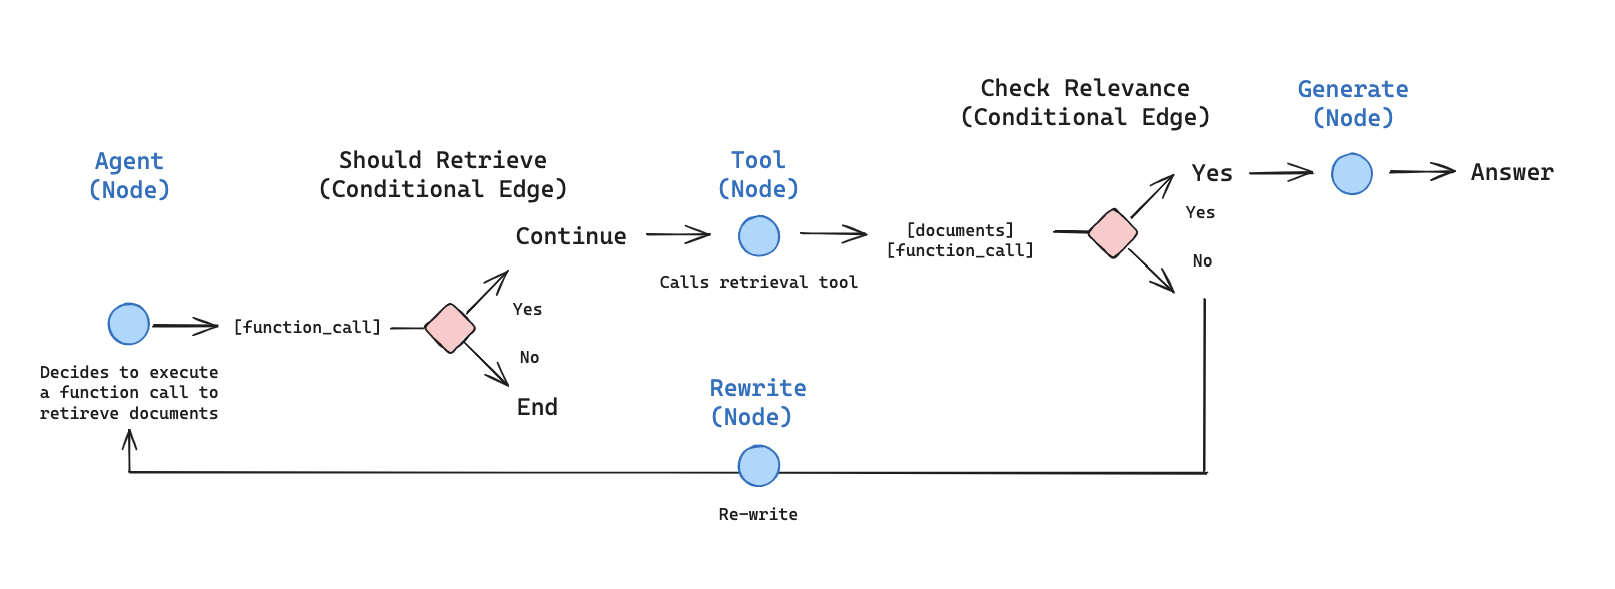

In [ ]:
# Import necessary modules for nodes and edges
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import tools_condition

### Edges

# Function to grade documents' relevance to the question
def grade_documents(state) -> Literal["generate", "rewrite"]:
    logger.debug(f'grade_documents............')
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatOpenAI(temperature=0, model="gpt-4o", streaming=True)

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"


### Nodes

# Function for the agent node
def agent(state):
    logger.debug(f'agent............')
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatOpenAI(temperature=0, streaming=True, model="gpt-4o")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

# Function to rewrite the query
def rewrite(state):
    logger.debug(f'rewrite............')
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n
    Look at the input and try to reason about the underlying semantic intent / meaning. \n
    Here is the initial question:
    \n ------- \n
    {question}
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatOpenAI(temperature=0, model="gpt-4o", streaming=True)
    response = model.invoke(msg)
    return {"messages": [response]}

# Function to generate an answer
def generate(state):
    logger.debug(f'generate............')
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated state with re-phrased question
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatOpenAI(model_name="gpt-4o", temperature=0, streaming=True)

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}


print("*" * 20 + "Prompt[rlm/rag-prompt]" + "*" * 20)
prompt = hub.pull("rlm/rag-prompt").pretty_print()  # Show what the prompt looks like

********************Prompt[rlm/rag-prompt]********************
================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


/usr/local/lib/python3.10/dist-packages/langchain/hub.py:86: DeprecationWarning: The `langchainhub sdk` is deprecated.
Please use the `langsmith sdk` instead:
  pip install langsmith
Use the `pull_prompt` method.
  res_dict = client.pull_repo(owner_repo_commit)


### 4.4. Graph

* Start with an agent, `call_model`
* Agent make a decision to call a function
* If so, then `action` to call tool (retriever)
* Then call agent with the tool output added to messages (`state`)

In [ ]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

# Define a new graph for the agent workflow
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([jira_retriever_tool, confluence_retriever_tool])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile the graph
graph = workflow.compile()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


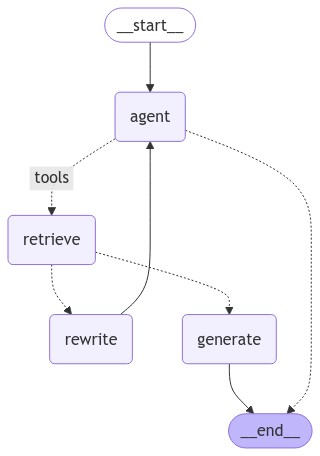

In [ ]:
from IPython.display import Image, display
# Display the compiled graph
try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
import pprint
def ask_agent(question):
  # Function to ask a question to the agent
  logger.debug('ask_agent............')
  response = 'Stub for the response'
  start_time = time.time()
  logger.debug(f'question = {question}')
  inputs = {
    "messages": [
        ("user", question),
    ]
  }
  for output in graph.stream(inputs):
    for key, value in output.items():
        pprint.pprint(f"Output from node '{key}':")
        pprint.pprint("---")
        pprint.pprint(value, indent=2, width=80, depth=None)
        response = value
    pprint.pprint("---END---")

  end_time = time.time()
  elapsed_time = end_time - start_time
  logger.debug(f'ask_agent elapsed_time = {elapsed_time} sec')
  return response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Ask a question to the agent
response = ask_agent("Give me tickets related to Moon Flight System. I need Ticket id, Summary and Project name.")
pprint.pprint(response)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-09-19 07:46:31.238 | DEBUG    | __main__:ask_agent:4 - ask_agent............
2024-09-19 07:46:31.241 | DEBUG    | __main__:ask_agent:7 - question = Give me tickets related to Moon Flight System. I need Ticket id, Summary and Project name.
2024-09-19 07:46:31.259 | DEBUG    | __main__:agent:77 - agent............


---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_Ke6YUxjMOJSVVKUEXvPJ1VYa', 'function': {'arguments': '{"query":"Moon Flight System"}', 'name': 'retrieve_jira_tickets'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-24eab141-4dea-4066-8b1c-31bd523d20e5-0', tool_calls=[{'name': 'retrieve_jira_tickets', 'args': {'query': 'Moon Flight System'}, 'id': 'call_Ke6YUxjMOJSVVKUEXvPJ1VYa', 'type': 'tool_call'}])]}
'---END---'


2024-09-19 07:46:32.266 | DEBUG    | __main__:grade_documents:15 - grade_documents............


---CHECK RELEVANCE---


2024-09-19 07:46:33.319 | DEBUG    | __main__:rewrite:98 - rewrite............


---DECISION: DOCS NOT RELEVANT---
no
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "hendersonbrian",\n        "Project description": "Moon Flight System software project",\n        "Project url": "http://www.cannon-oconnell.com/",\n        "Priority": "Critical",\n        "Resolution": "Fixed",\n        "Assignee": "hendersonbrian",\n        "Reporter": "kruegermitchell",\n        "Creator": "acolon",\n        "Created": "2023-09-21 20:22:50",\n        "Updated": "2023-10-22 01:02:56",\n\n"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "nathan73",\n        "Project description": "Moon Flight System software project",\n        "Project url": "https://www.johnson-collins.com/",\n        "Priority": "Low",\n        "Resolution": "Won\'t Fix",\n        "Assignee": "nathan73",\n        "Reporter": "sheliatorres",\

2024-09-19 07:46:35.092 | DEBUG    | __main__:agent:77 - agent............


"Output from node 'rewrite':"
'---'
{ 'messages': [ AIMessage(content='Certainly! Here\'s an improved version of the question:\n\n"Could you provide the ticket IDs, summaries, and project names for all tickets related to the Moon Flight System?"', response_metadata={'finish_reason': 'stop'}, id='run-25f59c90-0eb1-48f8-9d18-8b20e8bea2ca-0')]}
'---END---'
---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_Ak10lOiT56rduYnlQ779KN3N', 'function': {'arguments': '{"query":"Moon Flight System"}', 'name': 'retrieve_jira_tickets'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-d02159b9-4311-489f-81a2-1a732260ac1b-0', tool_calls=[{'name': 'retrieve_jira_tickets', 'args': {'query': 'Moon Flight System'}, 'id': 'call_Ak10lOiT56rduYnlQ779KN3N', 'type': 'tool_call'}])]}
'---END---'


2024-09-19 07:46:36.044 | DEBUG    | __main__:grade_documents:15 - grade_documents............


---CHECK RELEVANCE---


2024-09-19 07:46:37.089 | DEBUG    | __main__:rewrite:98 - rewrite............


---DECISION: DOCS NOT RELEVANT---
no
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "hendersonbrian",\n        "Project description": "Moon Flight System software project",\n        "Project url": "http://www.cannon-oconnell.com/",\n        "Priority": "Critical",\n        "Resolution": "Fixed",\n        "Assignee": "hendersonbrian",\n        "Reporter": "kruegermitchell",\n        "Creator": "acolon",\n        "Created": "2023-09-21 20:22:50",\n        "Updated": "2023-10-22 01:02:56",\n\n"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "nathan73",\n        "Project description": "Moon Flight System software project",\n        "Project url": "https://www.johnson-collins.com/",\n        "Priority": "Low",\n        "Resolution": "Won\'t Fix",\n        "Assignee": "nathan73",\n        "Reporter": "sheliatorres",\

2024-09-19 07:46:38.590 | DEBUG    | __main__:agent:77 - agent............


"Output from node 'rewrite':"
'---'
{ 'messages': [ AIMessage(content="Certainly! Here's an improved version of the question:\n\n---\n\nCould you provide the ticket details for the Moon Flight System? Specifically, I need the Ticket ID, Summary, and Project Name for each relevant ticket.\n\n---\n\nThis version is clearer and more specific about the information being requested.", response_metadata={'finish_reason': 'stop'}, id='run-fac7fa8f-b7c8-4253-aa78-d305207455b0-0')]}
'---END---'
---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_PWxtkFOo2RzNX0BdgDpmUw1a', 'function': {'arguments': '{"query":"Moon Flight System"}', 'name': 'retrieve_jira_tickets'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-5cd25c0c-655d-4b2b-b7c8-80f0494283c5-0', tool_calls=[{'name': 'retrieve_jira_tickets', 'args': {'query': 'Moon Flight System'}, 'id': 'call_PWxtkFOo2RzNX0BdgDp

2024-09-19 07:46:39.449 | DEBUG    | __main__:grade_documents:15 - grade_documents............


---CHECK RELEVANCE---


2024-09-19 07:46:40.489 | DEBUG    | __main__:rewrite:98 - rewrite............


---DECISION: DOCS NOT RELEVANT---
no
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "hendersonbrian",\n        "Project description": "Moon Flight System software project",\n        "Project url": "http://www.cannon-oconnell.com/",\n        "Priority": "Critical",\n        "Resolution": "Fixed",\n        "Assignee": "hendersonbrian",\n        "Reporter": "kruegermitchell",\n        "Creator": "acolon",\n        "Created": "2023-09-21 20:22:50",\n        "Updated": "2023-10-22 01:02:56",\n\n"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "nathan73",\n        "Project description": "Moon Flight System software project",\n        "Project url": "https://www.johnson-collins.com/",\n        "Priority": "Low",\n        "Resolution": "Won\'t Fix",\n        "Assignee": "nathan73",\n        "Reporter": "sheliatorres",\

2024-09-19 07:46:41.488 | DEBUG    | __main__:agent:77 - agent............


"Output from node 'rewrite':"
'---'
{ 'messages': [ AIMessage(content='Could you please provide the ticket IDs, summaries, and project names for all tickets related to the Moon Flight System?', response_metadata={'finish_reason': 'stop'}, id='run-37fa91d2-041b-437b-b180-e802a36b2e39-0')]}
'---END---'
---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_RMKUxpn8zSmGFNMTFjU3Anv9', 'function': {'arguments': '{"query":"Moon Flight System"}', 'name': 'retrieve_jira_tickets'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-f16a948d-0912-4370-908f-20037b316d9b-0', tool_calls=[{'name': 'retrieve_jira_tickets', 'args': {'query': 'Moon Flight System'}, 'id': 'call_RMKUxpn8zSmGFNMTFjU3Anv9', 'type': 'tool_call'}])]}
'---END---'


2024-09-19 07:46:42.413 | DEBUG    | __main__:grade_documents:15 - grade_documents............


---CHECK RELEVANCE---


2024-09-19 07:46:43.530 | DEBUG    | __main__:rewrite:98 - rewrite............


---DECISION: DOCS NOT RELEVANT---
no
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "hendersonbrian",\n        "Project description": "Moon Flight System software project",\n        "Project url": "http://www.cannon-oconnell.com/",\n        "Priority": "Critical",\n        "Resolution": "Fixed",\n        "Assignee": "hendersonbrian",\n        "Reporter": "kruegermitchell",\n        "Creator": "acolon",\n        "Created": "2023-09-21 20:22:50",\n        "Updated": "2023-10-22 01:02:56",\n\n"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "nathan73",\n        "Project description": "Moon Flight System software project",\n        "Project url": "https://www.johnson-collins.com/",\n        "Priority": "Low",\n        "Resolution": "Won\'t Fix",\n        "Assignee": "nathan73",\n        "Reporter": "sheliatorres",\

2024-09-19 07:46:44.327 | DEBUG    | __main__:agent:77 - agent............


"Output from node 'rewrite':"
'---'
{ 'messages': [ AIMessage(content='Could you please provide the ticket ID, summary, and project name for all tickets related to the Moon Flight System?', response_metadata={'finish_reason': 'stop'}, id='run-46c43389-07d9-406f-9764-d1b6aade700c-0')]}
'---END---'
---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_cKN79kzwNCixMwcoLqziJiYT', 'function': {'arguments': '{"query":"Moon Flight System"}', 'name': 'retrieve_jira_tickets'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-eaf51edb-51eb-4d34-823d-01aa360c070e-0', tool_calls=[{'name': 'retrieve_jira_tickets', 'args': {'query': 'Moon Flight System'}, 'id': 'call_cKN79kzwNCixMwcoLqziJiYT', 'type': 'tool_call'}])]}
'---END---'


2024-09-19 07:46:45.440 | DEBUG    | __main__:grade_documents:15 - grade_documents............


---CHECK RELEVANCE---


2024-09-19 07:46:46.496 | DEBUG    | __main__:rewrite:98 - rewrite............


---DECISION: DOCS NOT RELEVANT---
no
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "hendersonbrian",\n        "Project description": "Moon Flight System software project",\n        "Project url": "http://www.cannon-oconnell.com/",\n        "Priority": "Critical",\n        "Resolution": "Fixed",\n        "Assignee": "hendersonbrian",\n        "Reporter": "kruegermitchell",\n        "Creator": "acolon",\n        "Created": "2023-09-21 20:22:50",\n        "Updated": "2023-10-22 01:02:56",\n\n"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "nathan73",\n        "Project description": "Moon Flight System software project",\n        "Project url": "https://www.johnson-collins.com/",\n        "Priority": "Low",\n        "Resolution": "Won\'t Fix",\n        "Assignee": "nathan73",\n        "Reporter": "sheliatorres",\

2024-09-19 07:46:47.532 | DEBUG    | __main__:agent:77 - agent............


"Output from node 'rewrite':"
'---'
{ 'messages': [ AIMessage(content='Certainly! Here\'s an improved version of the question:\n\n"Could you provide the ticket ID, summary, and project name for all tickets related to the Moon Flight System?"', response_metadata={'finish_reason': 'stop'}, id='run-aba48f50-2353-44d7-877b-d8ef071e5a66-0')]}
'---END---'
---CALL AGENT---


2024-09-19 07:46:48.410 | DEBUG    | __main__:grade_documents:15 - grade_documents............


"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_P1lfGPLTCioOLrboWBFttccv', 'function': {'arguments': '{"query":"Moon Flight System"}', 'name': 'retrieve_jira_tickets'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-dbfb26f8-e1a3-4eae-a412-df922e55e6cc-0', tool_calls=[{'name': 'retrieve_jira_tickets', 'args': {'query': 'Moon Flight System'}, 'id': 'call_P1lfGPLTCioOLrboWBFttccv', 'type': 'tool_call'}])]}
'---END---'
---CHECK RELEVANCE---


2024-09-19 07:46:49.505 | DEBUG    | __main__:rewrite:98 - rewrite............


---DECISION: DOCS NOT RELEVANT---
no
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "hendersonbrian",\n        "Project description": "Moon Flight System software project",\n        "Project url": "http://www.cannon-oconnell.com/",\n        "Priority": "Critical",\n        "Resolution": "Fixed",\n        "Assignee": "hendersonbrian",\n        "Reporter": "kruegermitchell",\n        "Creator": "acolon",\n        "Created": "2023-09-21 20:22:50",\n        "Updated": "2023-10-22 01:02:56",\n\n"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "nathan73",\n        "Project description": "Moon Flight System software project",\n        "Project url": "https://www.johnson-collins.com/",\n        "Priority": "Low",\n        "Resolution": "Won\'t Fix",\n        "Assignee": "nathan73",\n        "Reporter": "sheliatorres",\

2024-09-19 07:46:50.134 | DEBUG    | __main__:agent:77 - agent............


"Output from node 'rewrite':"
'---'
{ 'messages': [ AIMessage(content='Could you please provide the ticket details related to the Moon Flight System? Specifically, I need the Ticket ID, Summary, and Project Name.', response_metadata={'finish_reason': 'stop'}, id='run-b9140b98-badb-40d6-a536-874972342b3c-0')]}
'---END---'
---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_OabchRKFTHfGkzM4RLJEM0h7', 'function': {'arguments': '{"query":"Moon Flight System"}', 'name': 'retrieve_jira_tickets'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-b6f369c6-a6ed-48ce-8f18-d106dee071c6-0', tool_calls=[{'name': 'retrieve_jira_tickets', 'args': {'query': 'Moon Flight System'}, 'id': 'call_OabchRKFTHfGkzM4RLJEM0h7', 'type': 'tool_call'}])]}
'---END---'


2024-09-19 07:46:51.246 | DEBUG    | __main__:grade_documents:15 - grade_documents............


---CHECK RELEVANCE---


2024-09-19 07:46:52.276 | DEBUG    | __main__:generate:132 - generate............


---DECISION: DOCS RELEVANT---
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "hendersonbrian",\n        "Project description": "Moon Flight System software project",\n        "Project url": "http://www.cannon-oconnell.com/",\n        "Priority": "Critical",\n        "Resolution": "Fixed",\n        "Assignee": "hendersonbrian",\n        "Reporter": "kruegermitchell",\n        "Creator": "acolon",\n        "Created": "2023-09-21 20:22:50",\n        "Updated": "2023-10-22 01:02:56",\n\n"Project name": "Moon Flight System",\n        "Project type": "software",\n        "Project lead": "nathan73",\n        "Project description": "Moon Flight System software project",\n        "Project url": "https://www.johnson-collins.com/",\n        "Priority": "Low",\n        "Resolution": "Won\'t Fix",\n        "Assignee": "nathan73",\n        "Reporter": "sheliatorres",\n      

/usr/local/lib/python3.10/dist-packages/langchain/hub.py:86: DeprecationWarning: The `langchainhub sdk` is deprecated.
Please use the `langsmith sdk` instead:
  pip install langsmith
Use the `pull_prompt` method.
  res_dict = client.pull_repo(owner_repo_commit)
2024-09-19 07:46:53.042 | DEBUG    | __main__:ask_agent:23 - ask_agent elapsed_time = 21.801168203353882 sec


"Output from node 'generate':"
'---'
{ 'messages': [ "I don't know. The provided context does not include specific "
                'ticket IDs or summaries related to the Moon Flight System.']}
'---END---'
{'messages': ["I don't know. The provided context does not include specific "
              'ticket IDs or summaries related to the Moon Flight System.']}


In [ ]:
# Ask a question to the agent
response = ask_agent("How to install Moon Flight System? Give me the main details")
pprint.pprint(response)
import IPython
from IPython.display import Image, display, Audio, Markdown
IPython.display.Markdown(response['messages'][0].content)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-09-19 07:47:12.064 | DEBUG    | __main__:ask_agent:4 - ask_agent............
2024-09-19 07:47:12.067 | DEBUG    | __main__:ask_agent:7 - question = How to install Moon Flight System? Give me the main details
2024-09-19 07:47:12.079 | DEBUG    | __main__:agent:77 - agent............


---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_pRcYmHVTarpYfhVAe3aLPNJL', 'function': {'arguments': '{"query": "Moon Flight System installation"}', 'name': 'retrieve_confluence'}, 'type': 'function'}, {'index': 1, 'id': 'call_iLDpubc2JjV3hQDOurixUZjG', 'function': {'arguments': '{"query": "Moon Flight System installation"}', 'name': 'retrieve_jira_tickets'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-677d7eb6-9e2e-4285-b915-c26ab0442315-0', tool_calls=[{'name': 'retrieve_confluence', 'args': {'query': 'Moon Flight System installation'}, 'id': 'call_pRcYmHVTarpYfhVAe3aLPNJL', 'type': 'tool_call'}, {'name': 'retrieve_jira_tickets', 'args': {'query': 'Moon Flight System installation'}, 'id': 'call_iLDpubc2JjV3hQDOurixUZjG', 'type': 'tool_call'}])]}
'---END---'


2024-09-19 07:47:13.677 | DEBUG    | __main__:grade_documents:15 - grade_documents............


---CHECK RELEVANCE---


2024-09-19 07:47:14.737 | DEBUG    | __main__:rewrite:98 - rewrite............


---DECISION: DOCS NOT RELEVANT---
no
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='API Reference: Moon Flight System offers a comprehensive API with endpoints for mission planning, trajectory calculation, system status, user management, and data retrieval.\n\nAPI Reference: Moon Flight System offers a comprehensive API with endpoints for mission planning, trajectory calculation, system status, user management, and data retrieval.\n\nAPI Reference: Moon Flight System offers a comprehensive API with endpoints for mission planning, trajectory calculation, system status, user management, and data retrieval.\n\nAPI Reference: Moon Flight System offers a comprehensive API with endpoints for mission planning, trajectory calculation, system status, user management, and data retrieval.', name='retrieve_confluence', id='9b81d372-9fbc-4b3c-b806-8a75a295e87f', tool_call_id='call_pRcYmHVTarpYfhVAe3aLPNJL'),
                ToolMessage(content='"Project name": "Moon Fligh

2024-09-19 07:47:15.354 | DEBUG    | __main__:agent:77 - agent............


"Output from node 'rewrite':"
'---'
{ 'messages': [ AIMessage(content='How can I install the Moon Flight System? Could you provide the main steps and details for the installation process?', response_metadata={'finish_reason': 'stop'}, id='run-962fc6d0-b6e8-4a57-befe-344a07274f4b-0')]}
'---END---'
---CALL AGENT---


2024-09-19 07:47:24.036 | DEBUG    | __main__:ask_agent:23 - ask_agent elapsed_time = 11.969022512435913 sec


"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='### Moon Flight System Installation Guide\n\n#### Main Details\n\n**Project Name:** Moon Flight System  \n**Project Type:** Software  \n**Project Lead:** Henderson Brian  \n**Project Description:** Moon Flight System software project  \n**Project URL:** [Moon Flight System](http://www.cannon-oconnell.com/)  \n**Priority:** Critical  \n**Resolution:** Fixed  \n**Assignee:** Henderson Brian  \n**Reporter:** Krueger Mitchell  \n**Creator:** Acolon  \n**Created:** 2023-09-21  \n**Updated:** 2023-10-22  \n\n#### Installation Steps\n\n1. **System Requirements:**\n   - Ensure your system meets the minimum requirements for the Moon Flight System software.\n   - Operating System: Windows 10 or later, macOS 10.15 or later, or a compatible Linux distribution.\n   - Memory: At least 8 GB of RAM.\n   - Storage: Minimum 500 MB of free disk space.\n   - Network: Stable internet connection for downloading and updates.\n\n2. **Downloa

### Moon Flight System Installation Guide

#### Main Details

**Project Name:** Moon Flight System  
**Project Type:** Software  
**Project Lead:** Henderson Brian  
**Project Description:** Moon Flight System software project  
**Project URL:** [Moon Flight System](http://www.cannon-oconnell.com/)  
**Priority:** Critical  
**Resolution:** Fixed  
**Assignee:** Henderson Brian  
**Reporter:** Krueger Mitchell  
**Creator:** Acolon  
**Created:** 2023-09-21  
**Updated:** 2023-10-22  

#### Installation Steps

1. **System Requirements:**
   - Ensure your system meets the minimum requirements for the Moon Flight System software.
   - Operating System: Windows 10 or later, macOS 10.15 or later, or a compatible Linux distribution.
   - Memory: At least 8 GB of RAM.
   - Storage: Minimum 500 MB of free disk space.
   - Network: Stable internet connection for downloading and updates.

2. **Download the Installer:**
   - Visit the [Moon Flight System official website](http://www.cannon-oconnell.com/).
   - Navigate to the Downloads section.
   - Select the appropriate installer for your operating system (Windows, macOS, or Linux).

3. **Run the Installer:**
   - Locate the downloaded installer file on your computer.
   - Double-click the installer file to start the installation process.
   - Follow the on-screen instructions to complete the installation.

4. **Configuration:**
   - After installation, launch the Moon Flight System application.
   - Go through the initial setup wizard to configure the basic settings.
   - Enter your user credentials and configure the system preferences as needed.

5. **API Integration:**
   - Moon Flight System offers a comprehensive API with endpoints for mission planning, trajectory calculation, system status, user management, and data retrieval.
   - Refer to the API documentation available on the official website for detailed instructions on integrating the API with your applications.

6. **Updates and Maintenance:**
   - Regularly check for software updates to ensure you have the latest features and security patches.
   - Follow the maintenance guidelines provided in the user manual to keep the system running smoothly.

For more detailed documentation and troubleshooting, refer to the official [Moon Flight System documentation](http://www.cannon-oconnell.com/documentation).

If you encounter any issues during the installation process, you can reach out to the project lead, Henderson Brian, or the support team through the contact information provided on the official website.

##5.Checking responses without agents by using EnsembleRetriever.

## 5.1.EnsembleRetriever
We will not use **Similarity Search**. Instead, we will use **EnsembleRetriever**, i.e. a combination of **BM25Retriever** (context search) and **EnsembleRetriever** (vector search). This approach gives the best result.

EnsembleRetriever see here: https://python.langchain.com/v0.2/docs/how_to/ensemble_retriever/

In [ ]:
from langchain.retrievers import BM25Retriever
from langchain.retrievers import EnsembleRetriever

def split_text(text, max_length):
    """
    Splitting a line into parts with a carriage return
    @param text:
    @param max_length:
    @return:
    """
    words = text.split()  # Разделяем строку на слова
    result = []  # Список для результата

    current_line = ""  # Текущая строка
    for word in words:
        if len(current_line) + len(word) <= max_length:  # Если добавление слова не превышает максимальную длину
            current_line += word + " "  # Добавляем слово и пробел к текущей строке
        else:
            result.append(current_line.strip())  # Добавляем текущую строку в результат без лишних пробелов
            current_line = word + " "  # Начинаем новую строку с текущим словом

    if current_line:  # Если осталась незавершенная строка
        result.append(current_line.strip())  # Добавляем незавершенную строку в результат

    return '\n'.join(result)  # Возвращаем результат, объединяя строки символом перевода строки


def get_message_content_ensemble(topic, db, source_chunks, k):
    logger.debug('get_message_content_ensemble............')
    start_time = time.time()
    logger.debug(f'topic={topic}')
    faiss_retriever = db.as_retriever(search_kwargs={"k": k})
    bm25_retriever = BM25Retriever.from_documents(source_chunks)
    bm25_retriever.k = k
    ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, faiss_retriever],
                                       weights=[0.5, 0.5])

    docs = ensemble_retriever.get_relevant_documents(topic)
    message_content = re.sub(r'\n{2}', ' ', '\n '.join(
        [f'\n#### {i + 1} Relevant chunk ####\n' + str(doc.metadata) + '\n' + split_text(doc.page_content, 80) + '\n' for i, doc in
         enumerate(docs)]))
    logger.debug(f'message_content={message_content}')
    end_time = time.time()
    elapsed_time = end_time - start_time
    logger.debug(f'get_message_content_ensemble elapsed_time = {elapsed_time} sec')
    return message_content

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
LL_MODEL='gpt-4o'
from openai import OpenAI
client = OpenAI(api_key=OPEN_AI_API_KEY)
def gpt_request(user_content, system_content):
  response = client.chat.completions.create(
    model=LL_MODEL,
    messages=[
      {"role": "system", "content": system_content}, # <-- This is the system message that provides context to the model
      {"role": "user", "content": user_content}     # <-- This is the user message for which the model will generate a response
    ]
  )
  return response.choices[0].message.content

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 5.1. Checking response for Jira by using EnsembleRetriever.

In [ ]:
import re
jira_topic = "Give me tickets related to Moon Flight System. I need Ticket id, Summary and Project name."
jira_message_content = get_message_content_ensemble(topic, jira_db, jira_source_chunks, 10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-09-19 08:17:25.090 | DEBUG    | __main__:get_message_content_ensemble:29 - get_message_content_ensemble............
2024-09-19 08:17:25.093 | DEBUG    | __main__:get_message_content_ensemble:31 - topic=How to install Moon Flight System? Give me the main details
2024-09-19 08:17:30.289 | DEBUG    | __main__:get_message_content_ensemble:42 - message_content=
#### 1 Relevant chunk ####
{'source': '/content/jira_tickets_10k.json'}
"Affects Version/s": "label1", "Fix Version/s": "label2", "Component/s": "UI",
"Due Date": "2023-11-03 02:37:28", "Votes": "1", "Labels": "label4",
"Description": "Nor ask fact pretty. Political control minute

In [ ]:
system_content = '''You are a useful assistant.
You have data on the necessary tickets in Jira..'''

user_content = f'{jira_topic}. The data is here: {jira_message_content}'

response = gpt_request(user_content, system_content)

print (response)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here are the tickets related to the "Moon Flight System" project:

1. **Ticket id**: 7759
   - **Summary**: See not coach tax himself turn move page.
   - **Project name**: Moon Flight System

2. **Ticket id**: 2728
   - **Summary**: Again traditional factor room.
   - **Project name**: Moon Flight System

3. **Ticket id**: 5721
   - **Summary**: Middle not end.
   - **Project name**: Moon Flight System

4. **Ticket id**: 3791
   - **Summary**: Book soon attack family most either.
   - **Project name**: Moon Flight System


In [ ]:
IPython.display.Markdown(response)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here are the tickets related to the "Moon Flight System" project:

1. **Ticket id**: 7759
   - **Summary**: See not coach tax himself turn move page.
   - **Project name**: Moon Flight System

2. **Ticket id**: 2728
   - **Summary**: Again traditional factor room.
   - **Project name**: Moon Flight System

3. **Ticket id**: 5721
   - **Summary**: Middle not end.
   - **Project name**: Moon Flight System

4. **Ticket id**: 3791
   - **Summary**: Book soon attack family most either.
   - **Project name**: Moon Flight System

### 5.2. Checking response for Confluence without agents by using EnsembleRetriever.

In [ ]:
confluence_topic = "How to install Moon Flight System? Give me the main details"
confluence_message_content = get_message_content_ensemble(topic, confluence_db, confluence_source_chunks, 4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-09-19 08:18:13.435 | DEBUG    | __main__:get_message_content_ensemble:29 - get_message_content_ensemble............
2024-09-19 08:18:13.438 | DEBUG    | __main__:get_message_content_ensemble:31 - topic=How to install Moon Flight System? Give me the main details
2024-09-19 08:18:13.928 | DEBUG    | __main__:get_message_content_ensemble:42 - message_content=
#### 1 Relevant chunk ####
{'title': 'Installation Instructions', 'id': '282088987', 'source': 'https://moonflightsystem.com/docs/282088987'}
Installation Instructions: Unzip the MFS-2024.1.zip file, run the installer
script with sudo privileges. Follow the prompts to complete the

In [ ]:
system_content = '''You are a useful assistant.
You have data on the necessary docs in Confluence..'''

user_content = f'''{confluence_topic}. The data is here: {confluence_message_content}'''

response = gpt_request(user_content, system_content)

print (response)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


To install the Moon Flight System, follow these main steps:

1. **Download the Install Package:**
   - Obtain the `MFS-2024.1.zip` file from the official source or your distribution method.

2. **Unzip the File:**
   - Use a tool to unzip the `MFS-2024.1.zip` file. This can be done via terminal or a graphical user interface, depending on your environment.
     - Command-line example:
       ```bash
       unzip MFS-2024.1.zip
       ```

3. **Run the Installer Script:**
   - Open a terminal and navigate to the directory where you unzipped the files.
   - Execute the installer script with sudo (administrator) privileges.
     - Example command:
       ```bash
       sudo ./install.sh
       ```

4. **Follow the Prompts:**
   - During the installation process, follow the on-screen prompts to complete the installation.

### System Requirements
Before installing, ensure your system meets the following requirements:
- **Processor:** Quad-core processor
- **Memory:** 16GB RAM
- **Storage:** 

In [ ]:
IPython.display.Markdown(response)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


To install the Moon Flight System, follow these main steps:

1. **Download the Install Package:**
   - Obtain the `MFS-2024.1.zip` file from the official source or your distribution method.

2. **Unzip the File:**
   - Use a tool to unzip the `MFS-2024.1.zip` file. This can be done via terminal or a graphical user interface, depending on your environment.
     - Command-line example:
       ```bash
       unzip MFS-2024.1.zip
       ```

3. **Run the Installer Script:**
   - Open a terminal and navigate to the directory where you unzipped the files.
   - Execute the installer script with sudo (administrator) privileges.
     - Example command:
       ```bash
       sudo ./install.sh
       ```

4. **Follow the Prompts:**
   - During the installation process, follow the on-screen prompts to complete the installation.

### System Requirements
Before installing, ensure your system meets the following requirements:
- **Processor:** Quad-core processor
- **Memory:** 16GB RAM
- **Storage:** 250GB SSD
- **Internet Connectivity:** Required for installation and updates

For more detailed documentation, you can refer to the official [Moon Flight System Documentation](https://moonflightsystem.com/docs/282084982).

Please follow this sequence to ensure your installation proceeds smoothly.